In [1]:
# AdaBoost
# 生成数据集（总共12000个样本，样本特征为10个，分为3个类别)
from sklearn.datasets import make_gaussian_quantiles
X,y = make_gaussian_quantiles(n_samples=12000,n_features=10,n_classes=3,random_state=1)

# 划分数据集 
from sklearn.model_selection import train_test_split # 旧版本是sklearn.cross_validation,新版本改了
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

# 训练模型
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
bdt_discrete = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                                  n_estimators=200,learning_rate=1.5,algorithm='SAMME')
bdt_discrete.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1.5, n_estimators=200)

In [2]:
# 测评
from sklearn.metrics import accuracy_score
discrete_test_errors = [] 
# from sklearn.externals.six.moves import zip # 这是用于python2的兼容，python3中直接内置了zip，不需要这一行
for discrete_train_predict in bdt_discrete.staged_predict(X_test):
    discrete_test_errors.append(1.0 - accuracy_score(discrete_train_predict,y_test))
n_trees_discrete = len(bdt_discrete)
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

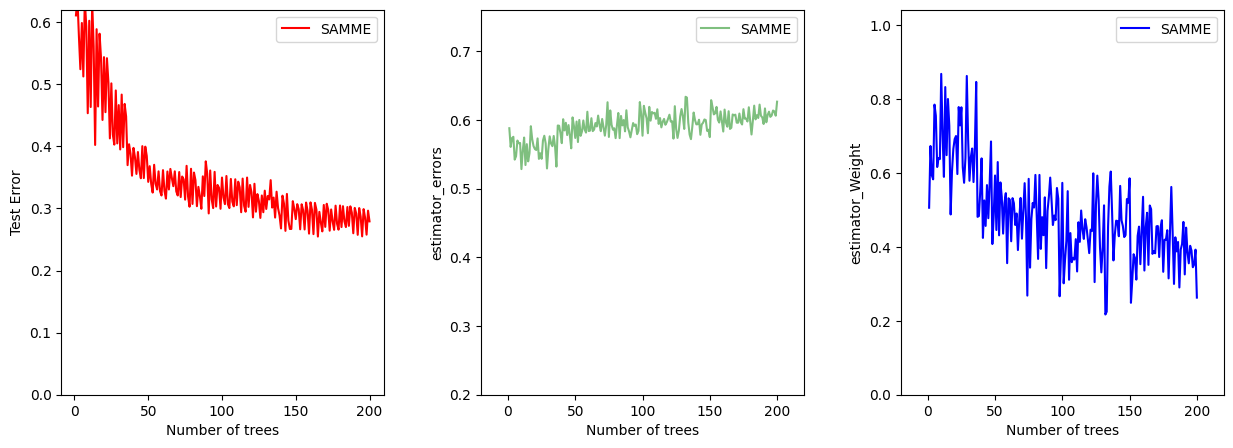

In [3]:
# 画图
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
# 模型在验证集上的误差率随基学习器数量的变化规律
plt.subplot(131)
plt.plot(range(1,n_trees_discrete+1),discrete_test_errors,'r',label='SAMME')
plt.legend()
plt.ylim(0,0.62)
plt.ylabel("Test Error")
plt.xlabel("Number of trees")

# 各基学习器的预测
plt.subplot(132)
plt.plot(range(1,n_trees_discrete+1),discrete_estimator_errors,'g',label='SAMME',alpha=0.5)
plt.legend()
plt.ylabel("estimator_errors")
plt.xlabel("Number of trees")
plt.ylim(0.2,discrete_estimator_errors.max()*1.2)
plt.xlim(-20,len(discrete_estimator_errors)+20)

# 各基学习器的投票权重
plt.subplot(133)
plt.plot(range(1,n_trees_discrete+1),discrete_estimator_weights,"b",label="SAMME")
plt.legend()
plt.ylabel("estimator_Weight")
plt.xlabel("Number of trees")
plt.ylim(0,discrete_estimator_weights.max()*1.2)
plt.xlim(-20,len(discrete_estimator_weights)+20)
plt.subplots_adjust(wspace=0.3)
plt.show()